In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/삼성증권_data.xlsx')
data.head()

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모
0,조윤정,female,53,230819,230909,73000,69,122000,67.12,NAVER,마케팅/광고/홍보,10억 이상 100억 이하
1,임채이,female,53,230806,230915,66000,56,90000,36.36,현대차,건설/건축,1000만원 이하
2,황현,female,41,230821,230908,119000,88,71000,-40.34,NAVER,건설/건축,100억 이상
3,안유주,female,30,230801,230906,73000,66,121000,65.75,현대차,관광레저서비스,1000만원 이하
4,강영주,female,43,230823,230904,100000,83,113000,13.00,현대모비스,디자인,1000만원 이하


## 클러스터링(단순 구분 ex. 나이, 직업 등)으로 나와 유사한 유저 묶기

In [ ]:
data_cluster = data[['성별', '나이', '자산규모']]
data_cluster.head(20)

,성별,나이,자산규모
0,female,53,10억 이상 100억 이하
1,female,53,1000만원 이하
2,female,41,100억 이상
3,female,30,1000만원 이하
4,female,43,1000만원 이하
5,female,45,1000만원 이하
6,female,37,10억 이상 100억 이하
7,female,28,1000만원 이하
8,female,47,1000만원 이상 1억 이하
9,female,51,1000만원 이상 1억 이하


In [ ]:
from sklearn.preprocessing import LabelEncoder
data_cluster['encoded_gender'] = LabelEncoder().fit_transform(data.성별)
data_cluster

<ipython-input-6-986b268b433b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['encoded_gender'] = LabelEncoder().fit_transform(data.성별)


,성별,나이,자산규모,encoded_gender
0,female,53,10억 이상 100억 이하,0
1,female,53,1000만원 이하,0
2,female,41,100억 이상,0
3,female,30,1000만원 이하,0
4,female,43,1000만원 이하,0
...,...,...,...,...
395,male,52,1억 이상 10억 이하,1
396,male,41,1억 이상 10억 이하,1
397,male,26,1000만원 이상 1억 이하,1
398,male,30,1000만원 이하,1


In [ ]:
data_cluster['encoded_asset'] = LabelEncoder().fit_transform(data.자산규모)
data_cluster

<ipython-input-7-53eae9931d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['encoded_asset'] = LabelEncoder().fit_transform(data.자산규모)


,성별,나이,자산규모,encoded_gender,encoded_asset
0,female,53,10억 이상 100억 이하,0,3
1,female,53,1000만원 이하,0,1
2,female,41,100억 이상,0,2
3,female,30,1000만원 이하,0,1
4,female,43,1000만원 이하,0,1
...,...,...,...,...,...
395,male,52,1억 이상 10억 이하,1,4
396,male,41,1억 이상 10억 이하,1,4
397,male,26,1000만원 이상 1억 이하,1,0
398,male,30,1000만원 이하,1,1


In [ ]:
data_cluster3 = data_cluster.drop(['성별','자산규모'], axis=1)
data_cluster3.head()

,나이,encoded_gender,encoded_asset
0,53,0,3
1,53,0,1
2,41,0,2
3,30,0,1
4,43,0,1


In [ ]:
sc = StandardScaler()
cc_scaled = sc.fit_transform(data_cluster3)
pd.DataFrame(cc_scaled)

,0,1,2
0,0.688360,-0.927613,0.974226
1,0.688360,-0.927613,-0.362619
2,-0.096282,-0.927613,0.305803
3,-0.815537,-0.927613,-0.362619
4,0.034492,-0.927613,-0.362619
...,...,...,...
395,0.622973,1.078036,1.642649
396,-0.096282,1.078036,1.642649
397,-1.077084,1.078036,-1.031042
398,-0.815537,1.078036,-0.362619


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=14)
clusters = kmeans.fit(cc_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['cluster'] = clusters.labels_
data.head(50)

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모,cluster
0,조윤정,female,53,230819,230909,73000,69,122000,67.12,NAVER,마케팅/광고/홍보,10억 이상 100억 이하,3
1,임채이,female,53,230806,230915,66000,56,90000,36.36,현대차,건설/건축,1000만원 이하,3
2,황현,female,41,230821,230908,119000,88,71000,-40.34,NAVER,건설/건축,100억 이상,0
3,안유주,female,30,230801,230906,73000,66,121000,65.75,현대차,관광레저서비스,1000만원 이하,0
4,강영주,female,43,230823,230904,100000,83,113000,13.00,현대모비스,디자인,1000만원 이하,0
5,최은별,female,45,230808,230925,87000,55,81000,-6.90,LG에너지솔루션,디자인,1000만원 이하,0
6,곽에스더,female,37,230806,230927,101000,69,90000,-10.89,SK이노베이션,의료,10억 이상 100억 이하,0
7,서선영,female,28,230815,230909,93000,84,64000,-31.18,포스코퓨처엠,건설/건축,1000만원 이하,0
8,조유정,female,47,230807,230923,61000,55,83000,36.07,LG전자,무역/유통,1000만원 이상 1억 이하,0
9,문여은,female,51,230825,230921,51000,31,119000,133.33,삼성물산,건설/건축,1000만원 이상 1억 이하,3


In [ ]:
data_cluster3['cluster'] = clusters.labels_
data_cluster3.head()

,나이,encoded_gender,encoded_asset,cluster
0,53,0,3,3
1,53,0,1,3
2,41,0,2,0
3,30,0,1,0
4,43,0,1,0


In [ ]:
data.groupby('cluster').count()

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모
cluster,,,,,,,,,,,,
0,103,103,103,103,103,103,103,103,103,103,103,103
1,81,81,81,81,81,81,81,81,81,81,81,81
2,126,126,126,126,126,126,126,126,126,126,126,126
3,90,90,90,90,90,90,90,90,90,90,90,90


In [ ]:
from sklearn.decomposition import PCA
X = cc_scaled.copy()
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-7.40887467e-01,  1.16422900e+00],
       [-1.20697728e+00,  2.63481801e-02],
       [-4.99851631e-01,  1.84015096e-01],
       [-2.98322524e-01, -7.61926014e-01],
       [-8.11909997e-01, -3.16379730e-01],
       [-8.90923454e-01, -2.47834148e-01],
       [-1.08779808e-01,  6.15864340e-01],
       [-2.19309067e-01, -8.30471596e-01],
       [-1.20298182e+00, -7.48228974e-01],
       [-1.36100873e+00, -6.11137810e-01],
       [-4.91860704e-01, -1.36513921e+00],
       [ 2.11269484e-01, -4.32895143e-01],
       [-1.59804911e+00, -4.05501064e-01],
       [-1.83908494e+00,  5.74712837e-01],
       [-1.51903565e+00, -4.74046646e-01],
       [-1.48352438e+00,  2.66257717e-01],
       [-8.19900924e-01,  1.23277458e+00],
       [-5.74869625e-01, -5.22016476e-01],
       [-2.70802187e-01,  1.52753266e+00],
       [-9.65941448e-01, -9.53865721e-01],
       [-2.03262312e+00, -2.85003627e-02],
       [-2.15313604e-01, -1.60504875e+00],
       [-1.83908494e+00,  5.74712837e-01],
       [ 6.

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = data['cluster']
pca_df.head()

,0,1,cluster
0,-0.740887,1.164229,3
1,-1.206977,0.026348,3
2,-0.499852,0.184015,0
3,-0.298323,-0.761926,0
4,-0.811910,-0.316380,0


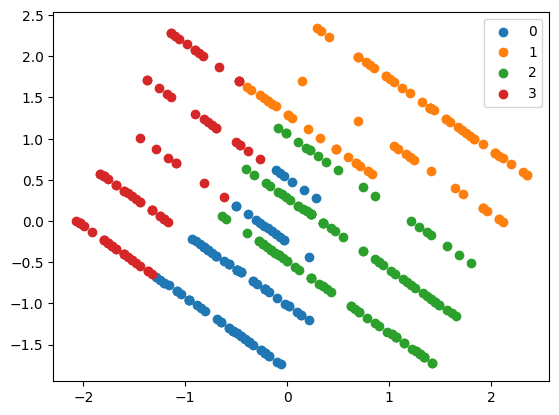

In [ ]:
import matplotlib.pyplot as plt
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [ ]:
data_cluster3.groupby('cluster').mean()

,나이,encoded_gender,encoded_asset
cluster,,,
0,32.796117,0.000000,0.815534
1,37.370370,0.728395,3.777778
2,41.746032,1.000000,0.698413
3,59.155556,0.000000,1.544444


## 수익률이 높은 유저 특징 소개
cluster 0에 속해 있는 30대 여성이라고 가정

In [ ]:
cluster_0 = data[data['cluster']==0]
cluster_0.head()

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모,cluster
2,황현,female,41,230821,230908,119000,88,71000,-40.34,NAVER,건설/건축,100억 이상,0
3,안유주,female,30,230801,230906,73000,66,121000,65.75,현대차,관광레저서비스,1000만원 이하,0
4,강영주,female,43,230823,230904,100000,83,113000,13.00,현대모비스,디자인,1000만원 이하,0
5,최은별,female,45,230808,230925,87000,55,81000,-6.90,LG에너지솔루션,디자인,1000만원 이하,0
6,곽에스더,female,37,230806,230927,101000,69,90000,-10.89,SK이노베이션,의료,10억 이상 100억 이하,0


상위 20명 데이터 출력

여기서 각 column에 대한 내용 뽑아서 시각화 or 텍스트로 정보 제공하면 될 듯

In [ ]:
cluster_0.sort_values(by='수익률', ascending=False)[:20]

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모,cluster
52,조연수,female,22,230809,230913,50000,27,114000,128.00,현대차,의료,1000만원 이상 1억 이하,0
101,안지후,female,43,230814,231024,54000,24,122000,125.93,삼성물산,교육,1000만원 이하,0
24,전소율,female,33,230804,230921,57000,18,127000,122.81,LG화학,마케팅/광고/홍보,1000만원 이상 1억 이하,0
103,손소영,female,35,230814,231014,50000,73,103000,106.00,SK이노베이션,무역/유통,1000만원 이하,0
98,문현경,female,28,230802,230927,51000,60,105000,105.88,삼성SDI,전문/특수 연구직,1000만원 이상 1억 이하,0
155,윤혜령,female,35,230801,231026,58000,50,116000,100.00,LG전자,전문/특수 연구직,1000만원 이하,0
54,노시연,female,38,230804,230930,56000,41,111000,98.21,기아,연구개발/설계,1000만원 이상 1억 이하,0
158,주예서,female,27,230820,231022,51000,51,96000,88.24,삼성전자,관광레저서비스,10억 이상 100억 이하,0
156,김유민,female,40,230827,231019,64000,15,118000,84.38,삼성SDI,경영사무,1000만원 이하,0
125,임시현,female,36,230818,231010,58000,91,101000,74.14,SK하이닉스,마케팅/광고/홍보,10억 이상 100억 이하,0


## 최근 투자하는 or 투자해서 가장 많이 오른 종목 추천

내가 속한 클러스터에서 최근 많이 투자하는 종목

In [ ]:
recent = cluster_0.sort_values(by='매수날짜', ascending=False)[:20]
recent

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모,cluster
202,이재희,female,27,230925,231015,123000,71,109000,-11.38,삼성SDI,서비스,1000만원 이상 1억 이하,0
214,신리원,female,43,230924,231007,80000,69,67000,-16.25,SK이노베이션,전문/특수 연구직,1000만원 이상 1억 이하,0
204,조정아,female,34,230924,231018,115000,67,111000,-3.48,기아,경영사무,1000만원 이하,0
213,하보라,female,29,230921,231013,99000,9,121000,22.22,LG전자,경영사무,100억 이상,0
201,고영인,female,25,230918,231002,94000,92,78000,-17.02,기아,미디어/문화,1000만원 이하,0
207,안재연,female,35,230917,231002,121000,84,119000,-1.65,삼성바이오로직스,미디어/문화,100억 이상,0
212,허주하,female,33,230915,231016,111000,4,64000,-42.34,LG전자,IT개발/인터넷,100억 이상,0
200,류예랑,female,30,230905,231025,129000,22,63000,-51.16,KB금융,연구개발/설계,1000만원 이상 1억 이하,0
209,허수린,female,22,230905,231025,78000,5,112000,43.59,LG화학,건설/건축,1000만원 이상 1억 이하,0
210,노유미,female,19,230902,231009,114000,74,53000,-53.51,삼성전자,관광레저서비스,1000만원 이상 1억 이하,0


In [ ]:
recent['투자종목'].value_counts()

SK이노베이션     2
기아          2
LG전자        2
삼성바이오로직스    2
삼성전자        2
NAVER       2
LG에너지솔루션    2
포스코퓨처엠      2
삼성SDI       1
KB금융        1
LG화학        1
카카오         1
Name: 투자종목, dtype: int64

내가 속한 클러스터에서 최근 수익률이 많이 난 종목

In [ ]:
recent.sort_values(by='수익률', ascending=False)

,이름,성별,나이,매수날짜,매도날짜,매수단가,매수수량,매도단가,수익률,투자종목,종사직군,자산규모,cluster
68,양윤빈,female,42,230831,230902,71000,10,116000,63.38,NAVER,경영사무,1000만원 이하,0
196,정소윤,female,42,230827,231004,64000,83,98000,53.12,SK이노베이션,관광레저서비스,1000만원 이하,0
74,조예주,female,28,230827,230901,67000,88,101000,50.75,삼성전자,관광레저서비스,1000만원 이하,0
209,허수린,female,22,230905,231025,78000,5,112000,43.59,LG화학,건설/건축,1000만원 이상 1억 이하,0
213,하보라,female,29,230921,231013,99000,9,121000,22.22,LG전자,경영사무,100억 이상,0
160,노혜린,female,19,230830,231016,95000,88,98000,3.16,포스코퓨처엠,마케팅/광고/홍보,1000만원 이하,0
207,안재연,female,35,230917,231002,121000,84,119000,-1.65,삼성바이오로직스,미디어/문화,100억 이상,0
204,조정아,female,34,230924,231018,115000,67,111000,-3.48,기아,경영사무,1000만원 이하,0
202,이재희,female,27,230925,231015,123000,71,109000,-11.38,삼성SDI,서비스,1000만원 이상 1억 이하,0
147,곽서영,female,34,230831,231027,101000,32,87000,-13.86,NAVER,관광레저서비스,1000만원 이하,0


In [ ]:
recent[['투자종목', '수익률']].groupby('투자종목').mean().sort_values(by='수익률', ascending = False)

,수익률
투자종목,
LG화학,43.590
NAVER,24.760
SK이노베이션,18.435
삼성전자,-1.380
LG전자,-10.060
기아,-10.250
삼성SDI,-11.380
포스코퓨처엠,-12.705
카카오,-23.530
